
Optimal number of clusters according to Elbow Method: 3


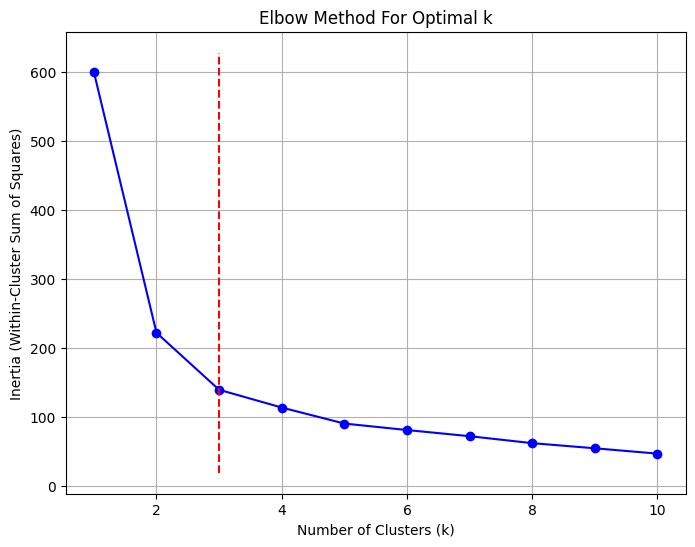

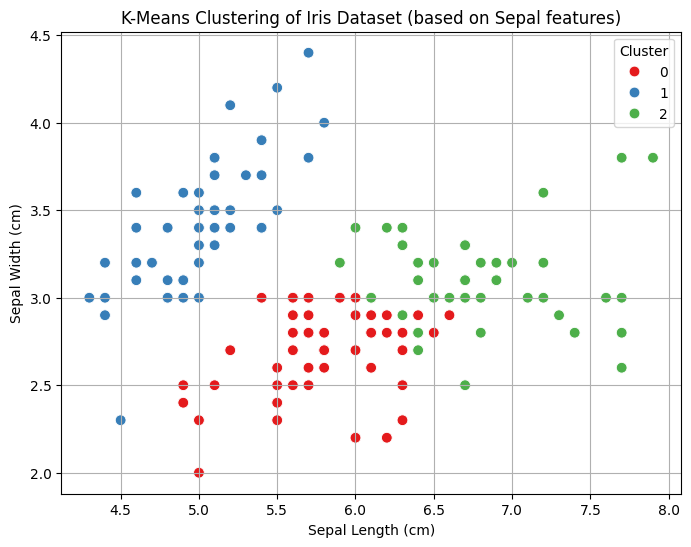


Cluster Labels vs Actual Species:

Actual Species  Cluster Label
0               1                50
1               0                39
                2                11
2               0                14
                2                36
Name: count, dtype: int64

Silhouette Score: 0.45994823920518635


In [8]:
# ------------------------------------
# Import Required Libraries
# ------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
from kneed import KneeLocator

# ------------------------------------
# Load the Iris Dataset
# ------------------------------------
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# ------------------------------------
# Standardize the Data
# ------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# Elbow Plot + Find Optimal k
# ------------------------------------
inertia = []  # List to store inertia for different k values
k_range = range(1, 11)  # Trying k = 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Find the elbow point using KneeLocator
knee_locator = KneeLocator(k_range, inertia, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

print(f"\nOptimal number of clusters according to Elbow Method: {optimal_k}")

# Plotting the Elbow Curve
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, 'bo-')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# ------------------------------------
# Apply KMeans with Optimal k
# ------------------------------------
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)

# Add cluster labels to the original dataset
X['Cluster'] = kmeans_final.labels_

# ------------------------------------
# Visualize the Clusters
# ------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=X['Cluster'], palette='Set1', s=60)
plt.title('K-Means Clustering of Iris Dataset (based on Sepal features)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# ------------------------------------
# Compare Clusters vs Actual Species
# ------------------------------------
df_clusters = pd.DataFrame({
    'Actual Species': iris.target,
    'Cluster Label': kmeans_final.labels_
})

print("\nCluster Labels vs Actual Species:\n")
print(df_clusters.value_counts().sort_index())

# ------------------------------------
# Calculate Silhouette Score
# ------------------------------------
score = silhouette_score(X_scaled, kmeans_final.labels_)
print("\nSilhouette Score:", score)
